# Saha Equation (with number density of free electrons $n_e$)

Chapter 8, Caroll and Ostlie.

$$
\frac{N_{i+1}}{N_i} = \frac{2Z_{i+1}}{n_e Z_i} (\frac{2\pi m_e kT}{h^2})^{3/2} e^{-\chi_i/kT}
$$

# Saha Equation (with electron pressure $P_e$)

$$
\frac{N_{i+1}}{N_i} = \frac{2kT Z_{i+1}}{P_e Z_i} (\frac{2\pi m_e kT}{h^2})^{3/2} e^{-\chi_i/kT}
$$

## Partition function (Z)

$$
Z = \sum^{\infty}_{j=1} g_j e^{-(E_j-E_1)/kT}
$$

$h$ is plank contant

$m_e$ is electron mass

$\chi_i$ is the ionization energy needed to remove electron from atom 

$k$ = Boltzman constant

$E_a,E_b$ are energies (typically eV)

$g_a,g_b$ are number of degenerate states (i.e. how many different quantum states are there which have the same energy) , e.g.  for hydrogen:

> $g_b = 2n^2$


In [47]:
import math
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
def saha_equation_pressure(Z_1, Z_2, k, T, P_e, m_e, chi_i, h):
    return \
    ((2 * k * T * Z_2) / (P_e * Z_1)) * \
    ((2 * math.pi * m_e * k * T) / h**2)**(3/2) * \
    math.e ** -(chi_i / (k*T))

In [32]:
def partition_function_j(j, E_j, E_1, k, T):
    """
    Calculate the value for one partition (j), of the partition function Z.
    Eq (8.7), Caroll and Ostlie p214.
    """
    return 2*(j**2) * math.e ** (-(E_j - E_1) / (k*T)) 

# Problem 8.7

In [33]:
j = 1
E_j = -13.6
E_1 = -13.6
k = 8.6173E-16
T = 10000

# j = 1
Z_1 = partition_function_j(j, E_j, E_1, k, T)

# j = 2
# E_j = -3.4
# Z_2 = partition_function(j, E_j, E_1, k, T)

print('Z_1: %s' % Z_1)
# print('Z_2: %s' % Z_2)

Z_1: 2.0


In [34]:
-(E_j - E_1)

-0.0

In [35]:
(-(E_j - E_1) / (k*T)) 

-0.0

In [36]:
 math.e ** (-(E_j - E_1) / (k*T)) 

1.0

# Problem 8.10

In this problem, you will follow a procedure similar to that of Example 8.1.4 for the case of a
stellar atmosphere composed of pure helium to find the temperature at the middle of the He I
partial ionization zone, where half of the He I atoms have been ionized. (Such an atmosphere would be found on a white dwarf of spectral type DB; see Section 16.1) 

The ionization energies of neutral helium and singly ionized helium are $\chi_I = 24.6 eV$ and $\chi_{II} = 54.4 eV$, respectively.

The partition functions are $Z_I = 1, Z_{II} = 2, Z_{III} = 1$ (as expected for any completely ionized atom). 

Use $P_e = 20 N m^{-2}$ for the electron pressure.

(a) Use Eq. (8.9) to find $N_{II}/N_I$ and $N_{III}/N_{II}$ for temperatures of 5000 K, 15,000 K, and 25,000K
How do they compare?

### Answer

$N_{II}/N_I$ - the ratio climbs constantly from 5000K to 25000K (almost 100% ionization at 25000K)

$N_{III}/N_{II}$ - the ratio climbs from 15000K to 25000K, however the change in ionization is miminmal.

In [44]:
m_e = 9.10938215E-31 # electron mass kg
h = 6.62606896E-34   # plank constant J
k = 1.38065E-23      # boltzman constant J 

# REPLICATING EXAMPLE 8.1.4 p215

Z_1 = 2
Z_2 = 1
P_e = 20

chi_1_ev = 13.6
chi_1 = 2.17896e-18

# equation gives ratio of N_2/N_1
ratio1 = saha_equation_pressure(Z_1, Z_2, k, 5000, P_e, m_e, chi_1, h)
ratio2 = saha_equation_pressure(Z_1, Z_2, k, 10000, P_e, m_e, chi_1, h)
ratio3 = saha_equation_pressure(Z_1, Z_2, k, 15000, P_e, m_e, chi_1, h)

# convert ratio to fraction (i.e. 0-1)
frac1 = ratio1 / (1 + ratio1)
frac2 = ratio2 / (1 + ratio2)
frac3 = ratio3 / (1 + ratio3)

print('5000: %s, 10000: %s, 15000: %a' % (frac1,frac2,frac3))

5000: 5.769709890712015e-08, 10000: 0.6999249846969674, 15000: 0.9991929471110168


In [70]:
# Part A, T = 5000K
k = 1.3806E-23
Z_1 = 1
Z_2 = 2
Z_3 = 1
P_e = 20

chi_1_ev = 24.6
chi_1 = 3.94135e-18

chi_2_ev = 54.4
chi_2 = 8.71584e-18

# ratio of N2/N1
s1_5000 = saha_equation_pressure(Z_1, Z_2, k, 5000, P_e, m_e, chi_1, h)
s1_15000 = saha_equation_pressure(Z_1, Z_2, k, 15000, P_e, m_e, chi_1, h)
s1_25000 = saha_equation_pressure(Z_1, Z_2, k, 25000, P_e, m_e, chi_1, h)

# convert ratio to fraction (i.e. 0-1)
s1_frac1 = s1_5000 / (1 + s1_5000)
s1_frac2 = s1_15000 / (1 + s1_15000)
s1_frac3 = s1_25000 / (1 + s1_25000)

print('S1 ratio - 5000: %s, 15000: %s, 25000: %a' % (s1_5000,s1_15000,s1_25000))
print('S1 frac - 5000: %s, 15000: %s, 25000: %a' % (s1_frac1,s1_frac2,s1_frac3))

# ratio of N3/N2
s2_5000 = saha_equation_pressure(Z_1, Z_2, k, 5000, P_e, m_e, chi_2, h)
s2_15000 = saha_equation_pressure(Z_1, Z_2, k, 15000, P_e, m_e, chi_2, h)
s2_25000 = saha_equation_pressure(Z_1, Z_2, k, 25000, P_e, m_e, chi_2, h)

# convert ratio to fraction (i.e. 0-1)
s2_frac1 = s2_5000 / (1 + s2_5000)
s2_frac2 = s2_15000 / (1 + s2_15000)
s2_frac3 = s2_25000 / (1 + s2_25000)

print('S2 ratio - 5000: %s, 15000: %s, 25000: %a' % (s2_5000,s2_15000,s2_25000))
print('S2 frac - 5000: %s, 15000: %s, 25000: %a' % (s2_frac1,s2_frac2,s2_frac3))

S1 ratio - 5000: 1.8827806579506554e-18, 15000: 0.996880389568512, 25000: 7235.573580460026
S1 frac - 5000: 1.8827806579506554e-18, 15000: 0.49921887899551104, 25000: 0.9998618130543576
S2 ratio - 5000: 1.7243794201348717e-48, 15000: 9.68101189451154e-11, 25000: 0.007109508616906568
S2 frac - 5000: 1.7243794201348717e-48, 15000: 9.68101189357432e-11, 25000: 0.007059320318274293


<AxesSubplot:xlabel='Temp'>

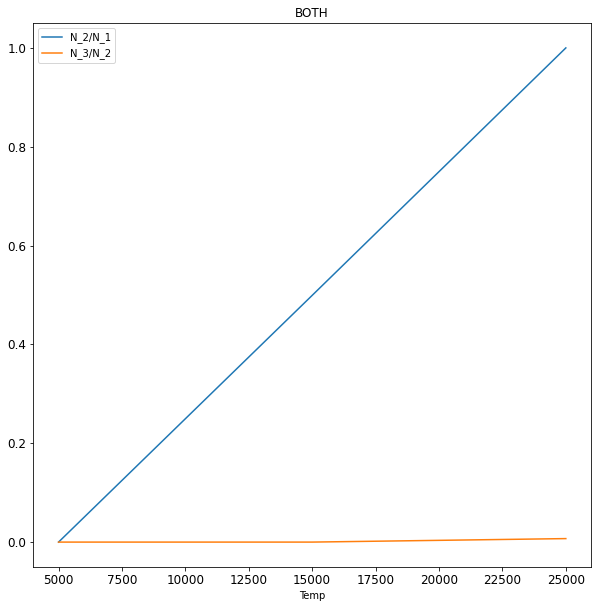

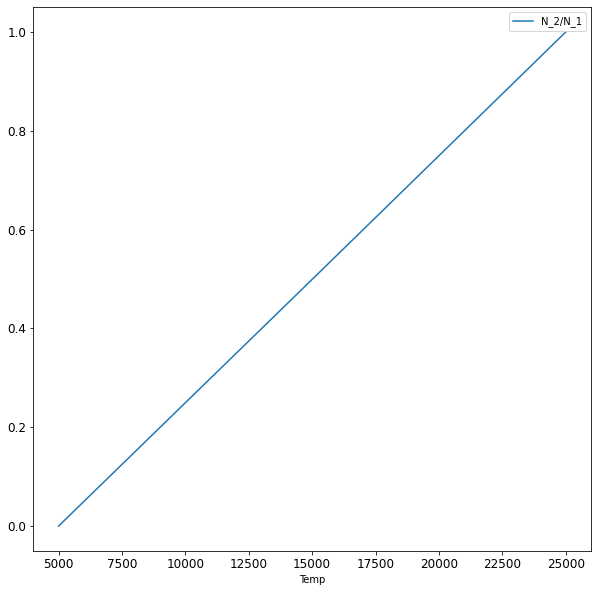

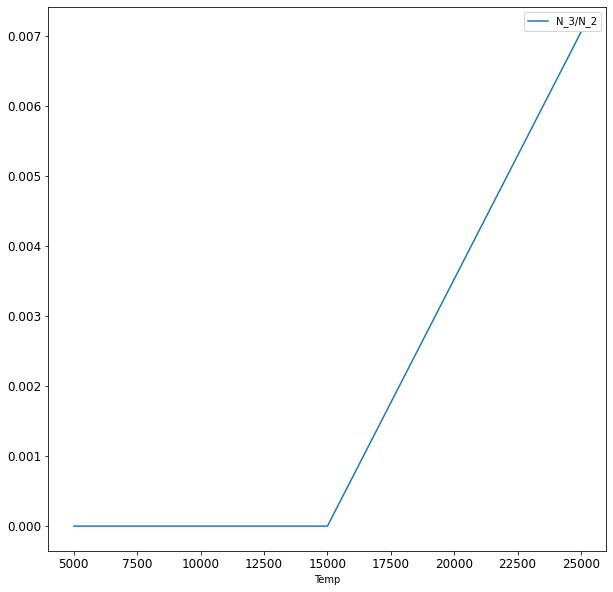

In [88]:
df = pd.DataFrame({
    'Temp': [5000, 15000, 25000], 
    'N_2/N_1': [s1_frac1, s1_frac2, s1_frac3],
    'N_3/N_2': [s2_frac1, s2_frac2, s2_frac3]
})

df.plot(title='BOTH', kind='line', x='Temp', figsize=(10,10), fontsize=12)

df.plot(kind='line', x='Temp', y='N_2/N_1', figsize=(10,10), fontsize=12)
df.plot(kind='line', x='Temp', y='N_3/N_2', figsize=(10,10), fontsize=12)